In [1]:
import pandas as pd
import numpy as np
from google.colab import files

In [2]:
df = files.upload()

Saving Credit_Prediction.csv to Credit_Prediction.csv


In [3]:
df = pd.read_csv("Credit_Prediction.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10147 non-null  int64  
 1   Customer_Age              10147 non-null  float64
 2   Gender                    10046 non-null  object 
 3   Dependent_count           10147 non-null  int64  
 4   Education_Level           10147 non-null  object 
 5   Marital_Status            9136 non-null   object 
 6   Income_Category           10147 non-null  object 
 7   Card_Category             9136 non-null   object 
 8   Months_on_book            10036 non-null  float64
 9   Total_Relationship_Count  10137 non-null  float64
 10  Months_Inactive_12_mon    10147 non-null  int64  
 11  Contacts_Count_12_mon     10147 non-null  int64  
 12  Credit_Limit              10147 non-null  float64
 13  Total_Revolving_Bal       10147 non-null  int64  
 14  Total_

In [4]:
#Data Cleaning
df.drop_duplicates()
print(df.isna().sum())

CLIENTNUM                       0
Customer_Age                    0
Gender                        101
Dependent_count                 0
Education_Level                 0
Marital_Status               1011
Income_Category                 0
Card_Category                1011
Months_on_book                111
Total_Relationship_Count       10
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 19                 10147
dtype: int64


In [5]:
#calculating percentage of null records of each column
missing_values = df.isna().sum()
total_rows = len(df)

print((missing_values/total_rows) * 100)

CLIENTNUM                     0.000000
Customer_Age                  0.000000
Gender                        0.995368
Dependent_count               0.000000
Education_Level               0.000000
Marital_Status                9.963536
Income_Category               0.000000
Card_Category                 9.963536
Months_on_book                1.093919
Total_Relationship_Count      0.098551
Months_Inactive_12_mon        0.000000
Contacts_Count_12_mon         0.000000
Credit_Limit                  0.000000
Total_Revolving_Bal           0.000000
Total_Amt_Chng_Q4_Q1          0.000000
Total_Trans_Amt               0.000000
Total_Trans_Ct                0.000000
Total_Ct_Chng_Q4_Q1           0.000000
Avg_Utilization_Ratio         0.000000
Unnamed: 19                 100.000000
dtype: float64


In [6]:
df.dropna(subset=['Gender', 'Marital_Status',
                  'Card_Category',
                  'Months_on_book',
                  'Total_Relationship_Count'], inplace=True) #Since 'Gender', 'Marital_Status', 'Months_on_book', 'Total_Relationship_Count' column has null values <10%. Removing the null records

In [7]:
df = df.drop(columns = ['Unnamed: 19']) #Because it contains no record

In [8]:
#calculating percentage of null records of each column
missing_values = df.isna().sum()
total_rows = len(df)

print((missing_values/total_rows) * 100) #Now we have no null records

CLIENTNUM                   0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64


In [9]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8.051000e+03,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000
mean,7.391442e+08,46.768837,2.346044,35.953174,3.814806,2.345423,2.451745,8664.467805,1163.902248,0.757762,4399.748851,64.798783,0.711330,0.275295
std,3.695128e+07,14.016584,1.302359,7.955961,1.561846,1.009912,1.104255,9100.102008,816.347459,0.217963,3414.870173,23.622260,0.236801,0.276095
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130511e+08,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2548.500000,383.500000,0.628000,2138.000000,45.000000,0.581000,0.023000
50%,7.179500e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4553.000000,1274.000000,0.736000,3890.000000,67.000000,0.702000,0.176000
75%,7.730955e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11187.500000,1786.000000,0.857000,4738.000000,81.000000,0.818000,0.504000
max,8.283431e+08,439.225040,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,3.397000,18484.000000,139.000000,3.714000,0.995000


In [10]:
#Since the max age is unusually high. So, lets evaluate it.

age_greater_than_100 = df[df['Customer_Age'] > 100]
len(age_greater_than_100)
total_rows = len(df)

print((len(age_greater_than_100)/total_rows) * 100) #Since, the unsual customer Age records are less than 10%. Therefore, removing such records

0.1614706247671097


In [11]:
df = df[df['Customer_Age'] < 100] #keeping only records of customers having age less than 100
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8.038000e+03,8038.000000,8038.000000,8038.000000,8038.000000,8038.000000,8038.000000,8038.000000,8038.000000,8038.000000,8038.000000,8038.000000,8038.000000,8038.000000
mean,7.391469e+08,46.323588,2.346604,35.944762,3.816248,2.345360,2.450610,8664.302973,1163.961558,0.757962,4398.908435,64.785519,0.711348,0.275324
std,3.694740e+07,8.041414,1.302478,7.955609,1.561545,1.009183,1.103677,9100.614160,816.420155,0.218046,3415.603973,23.627607,0.236958,0.276085
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130592e+08,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2548.000000,380.250000,0.628000,2136.250000,45.000000,0.581000,0.023000
50%,7.179553e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4550.500000,1274.000000,0.736000,3890.000000,67.000000,0.702000,0.176000
75%,7.731328e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11190.500000,1786.000000,0.858000,4737.750000,81.000000,0.818000,0.504000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,3.397000,18484.000000,139.000000,3.714000,0.995000


In [12]:
unknown_marital_status = df[df['Marital_Status'] == 'Unknown']
total_rows = len(df)
print((len(unknown_marital_status)/total_rows) * 100) #Since, customer records whose marital status is unknown is <10%. Removing it because unknown marital status create ambiguity.

7.50186613585469


In [13]:
df = df[df['Marital_Status'] != 'Unknown']
unknown_marital_status = df[df['Marital_Status'] == 'Unknown']
len(unknown_marital_status)

0

In [14]:
unknown_Edu_status = df[df['Education_Level'] == 'Unknown']  #Since, customer records whose Edcucation status is unknown is between 10% to 50%. Using imputational technique to replace with the mode.
total_rows = len(df)
print((len(unknown_Edu_status)/total_rows) * 100)

14.741089441829185


In [15]:
mode_value = df['Education_Level'].mode()[0]

# Replace 'Unknown' with the mode value
df['Education_Level'] = df['Education_Level'].replace('Unknown', mode_value)

In [16]:
unknown_Edu_status = df[df['Education_Level'] == 'Unknown']
total_rows = len(df)
print((len(unknown_Edu_status)/total_rows) * 100)

0.0


In [17]:
unknown_InC_status = df[df['Income_Category'] == 'Unknown']  #Since, customer records whose income category is unknown is between 10% to 50%. Using imputational technique to replace with the mode.
total_rows = len(df)
print((len(unknown_InC_status)/total_rows) * 100)

10.907868190988568


In [18]:
mode_value = df['Income_Category'].mode()[0]

# Replace 'Unknown' with the mode value
df['Income_Category'] = df['Income_Category'].replace('Unknown', mode_value)

In [19]:
unknown_InC_status = df[df['Income_Category'] == 'Unknown']
total_rows = len(df)
print((len(unknown_InC_status)/total_rows) * 100)

0.0


In [20]:
df

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,818770008,49.0,F,5,Graduate,Single,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,713982108,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000
5,713061558,44.0,M,2,Graduate,Married,$40K - $60K,Blue,36.0,3.0,1,2,4010.0,1247,1.376,1088,24,0.846,0.311
6,810347208,51.0,M,4,Graduate,Married,$120K +,Gold,46.0,6.0,1,3,34516.0,2264,1.975,1330,31,0.722,0.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139,720899883,44.0,F,1,High School,Married,$40K - $60K,Blue,35.0,6.0,2,2,6849.0,0,0.736,3770,82,0.864,0.000
10142,768720708,41.0,F,3,High School,Married,Less than $40K,Blue,30.0,4.0,4,2,3280.0,2327,0.784,4268,84,1.000,0.709
10144,712361583,47.0,M,5,Graduate,Married,$80K - $120K,Silver,36.0,3.0,3,1,34516.0,760,0.407,3756,67,0.558,0.022
10145,788786208,46.0,F,2,College,Married,Less than $40K,Blue,27.0,6.0,3,3,9881.0,1794,0.582,4725,85,0.735,0.182


In [21]:
#Encoding Categorical -> Numerical

one_hot_encoded_data = pd.get_dummies(df.Gender)  #https://www.geeksforgeeks.org/ml-one-hot-encoding/
one_hot_encoded_data = one_hot_encoded_data.astype(int)
df = pd.concat([df, one_hot_encoded_data], axis = 1)
df = df.drop(['F', 'Gender'], axis = 1)
df = df.rename(columns={'M': 'Male'})
df

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Male
0,768805383,45.0,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,1
1,818770008,49.0,5,Graduate,Single,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105,0
2,713982108,51.0,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,1
5,713061558,44.0,2,Graduate,Married,$40K - $60K,Blue,36.0,3.0,1,2,4010.0,1247,1.376,1088,24,0.846,0.311,1
6,810347208,51.0,4,Graduate,Married,$120K +,Gold,46.0,6.0,1,3,34516.0,2264,1.975,1330,31,0.722,0.066,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139,720899883,44.0,1,High School,Married,$40K - $60K,Blue,35.0,6.0,2,2,6849.0,0,0.736,3770,82,0.864,0.000,0
10142,768720708,41.0,3,High School,Married,Less than $40K,Blue,30.0,4.0,4,2,3280.0,2327,0.784,4268,84,1.000,0.709,0
10144,712361583,47.0,5,Graduate,Married,$80K - $120K,Silver,36.0,3.0,3,1,34516.0,760,0.407,3756,67,0.558,0.022,1
10145,788786208,46.0,2,College,Married,Less than $40K,Blue,27.0,6.0,3,3,9881.0,1794,0.582,4725,85,0.735,0.182,0


In [22]:
one_hot_encoded_data = pd.get_dummies(df.Marital_Status)  #https://www.geeksforgeeks.org/ml-one-hot-encoding/
one_hot_encoded_data = one_hot_encoded_data.astype(int)
df = pd.concat([df, one_hot_encoded_data], axis = 1)
df = df.drop(['Divorced', 'Marital_Status'], axis = 1)
df = df.rename(columns={'Single': 'Marital_St_Single', 'Married': 'Marital_St_Married'})
df

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Male,Marital_St_Married,Marital_St_Single
0,768805383,45.0,3,High School,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,1,1,0
1,818770008,49.0,5,Graduate,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105,0,0,1
2,713982108,51.0,3,Graduate,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,1,1,0
5,713061558,44.0,2,Graduate,$40K - $60K,Blue,36.0,3.0,1,2,4010.0,1247,1.376,1088,24,0.846,0.311,1,1,0
6,810347208,51.0,4,Graduate,$120K +,Gold,46.0,6.0,1,3,34516.0,2264,1.975,1330,31,0.722,0.066,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139,720899883,44.0,1,High School,$40K - $60K,Blue,35.0,6.0,2,2,6849.0,0,0.736,3770,82,0.864,0.000,0,1,0
10142,768720708,41.0,3,High School,Less than $40K,Blue,30.0,4.0,4,2,3280.0,2327,0.784,4268,84,1.000,0.709,0,1,0
10144,712361583,47.0,5,Graduate,$80K - $120K,Silver,36.0,3.0,3,1,34516.0,760,0.407,3756,67,0.558,0.022,1,1,0
10145,788786208,46.0,2,College,Less than $40K,Blue,27.0,6.0,3,3,9881.0,1794,0.582,4725,85,0.735,0.182,0,1,0


In [23]:
one_hot_encoded_data = pd.get_dummies(df.Card_Category)  #https://www.geeksforgeeks.org/ml-one-hot-encoding/
one_hot_encoded_data = one_hot_encoded_data.astype(int)
df = pd.concat([df, one_hot_encoded_data], axis = 1)
df = df.drop(['Silver', 'Card_Category'], axis = 1)
df = df.rename(columns={'Blue': 'Card_Blue',
                        'Gold': 'Card_Gold',
                        'Platinum': 'Card_Platinum'})
df

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Male,Marital_St_Married,Marital_St_Single,Card_Blue,Card_Gold,Card_Platinum
0,768805383,45.0,3,High School,$60K - $80K,39.0,5.0,1,3,12691.0,...,1144,42,1.625,0.061,1,1,0,1,0,0
1,818770008,49.0,5,Graduate,Less than $40K,44.0,6.0,1,2,8256.0,...,1291,33,3.714,0.105,0,0,1,1,0,0
2,713982108,51.0,3,Graduate,$80K - $120K,36.0,4.0,1,0,3418.0,...,1887,20,2.333,0.000,1,1,0,1,0,0
5,713061558,44.0,2,Graduate,$40K - $60K,36.0,3.0,1,2,4010.0,...,1088,24,0.846,0.311,1,1,0,1,0,0
6,810347208,51.0,4,Graduate,$120K +,46.0,6.0,1,3,34516.0,...,1330,31,0.722,0.066,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139,720899883,44.0,1,High School,$40K - $60K,35.0,6.0,2,2,6849.0,...,3770,82,0.864,0.000,0,1,0,1,0,0
10142,768720708,41.0,3,High School,Less than $40K,30.0,4.0,4,2,3280.0,...,4268,84,1.000,0.709,0,1,0,1,0,0
10144,712361583,47.0,5,Graduate,$80K - $120K,36.0,3.0,3,1,34516.0,...,3756,67,0.558,0.022,1,1,0,0,0,0
10145,788786208,46.0,2,College,Less than $40K,27.0,6.0,3,3,9881.0,...,4725,85,0.735,0.182,0,1,0,1,0,0


In [24]:
#Now we can see that Education_Level and Income Category are ordinal categorical variables
#Therefore, it is appropriate to use ordinal encoding Source: https://medium.com/@brandon93.w/converting-categorical-data-into-numerical-form-a-practical-guide-for-data-science-99fdf42d0e10

education_mapping = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5
}


income_category_mapping = {
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4
}

df['Education_Level'] = df['Education_Level'].map(education_mapping)
df['Income_Category'] = df['Income_Category'].map(income_category_mapping)

df.head()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Male,Marital_St_Married,Marital_St_Single,Card_Blue,Card_Gold,Card_Platinum
0,768805383,45.0,3,1,2,39.0,5.0,1,3,12691.0,...,1144,42,1.625,0.061,1,1,0,1,0,0
1,818770008,49.0,5,3,0,44.0,6.0,1,2,8256.0,...,1291,33,3.714,0.105,0,0,1,1,0,0
2,713982108,51.0,3,3,3,36.0,4.0,1,0,3418.0,...,1887,20,2.333,0.000,1,1,0,1,0,0
5,713061558,44.0,2,3,1,36.0,3.0,1,2,4010.0,...,1088,24,0.846,0.311,1,1,0,1,0,0
6,810347208,51.0,4,3,4,46.0,6.0,1,3,34516.0,...,1330,31,0.722,0.066,1,1,0,0,1,0


In [25]:
last_three_columns = df.columns[-6:]

# Create a new column order list
new_column_order = list(df.columns[:-6])  # All columns except the last three
new_column_order[3:3] = last_three_columns  # Insert the last three columns at the fourth position

df = df[new_column_order]

df.head()

,CLIENTNUM,Customer_Age,Dependent_count,Male,Marital_St_Married,Marital_St_Single,Card_Blue,Card_Gold,Card_Platinum,Education_Level,...,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45.0,3,1,1,0,1,0,0,1,...,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,818770008,49.0,5,0,0,1,1,0,0,3,...,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,713982108,51.0,3,1,1,0,1,0,0,3,...,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000
5,713061558,44.0,2,1,1,0,1,0,0,3,...,3.0,1,2,4010.0,1247,1.376,1088,24,0.846,0.311
6,810347208,51.0,4,1,1,0,0,1,0,3,...,6.0,1,3,34516.0,2264,1.975,1330,31,0.722,0.066


array([[<Axes: title={'center': 'CLIENTNUM'}>,
        <Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Dependent_count'}>,
        <Axes: title={'center': 'Male'}>,
        <Axes: title={'center': 'Marital_St_Married'}>],
       [<Axes: title={'center': 'Marital_St_Single'}>,
        <Axes: title={'center': 'Card_Blue'}>,
        <Axes: title={'center': 'Card_Gold'}>,
        <Axes: title={'center': 'Card_Platinum'}>,
        <Axes: title={'center': 'Education_Level'}>],
       [<Axes: title={'center': 'Income_Category'}>,
        <Axes: title={'center': 'Months_on_book'}>,
        <Axes: title={'center': 'Total_Relationship_Count'}>,
        <Axes: title={'center': 'Months_Inactive_12_mon'}>,
        <Axes: title={'center': 'Contacts_Count_12_mon'}>],
       [<Axes: title={'center': 'Credit_Limit'}>,
        <Axes: title={'center': 'Total_Revolving_Bal'}>,
        <Axes: title={'center': 'Total_Amt_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Total_Trans_

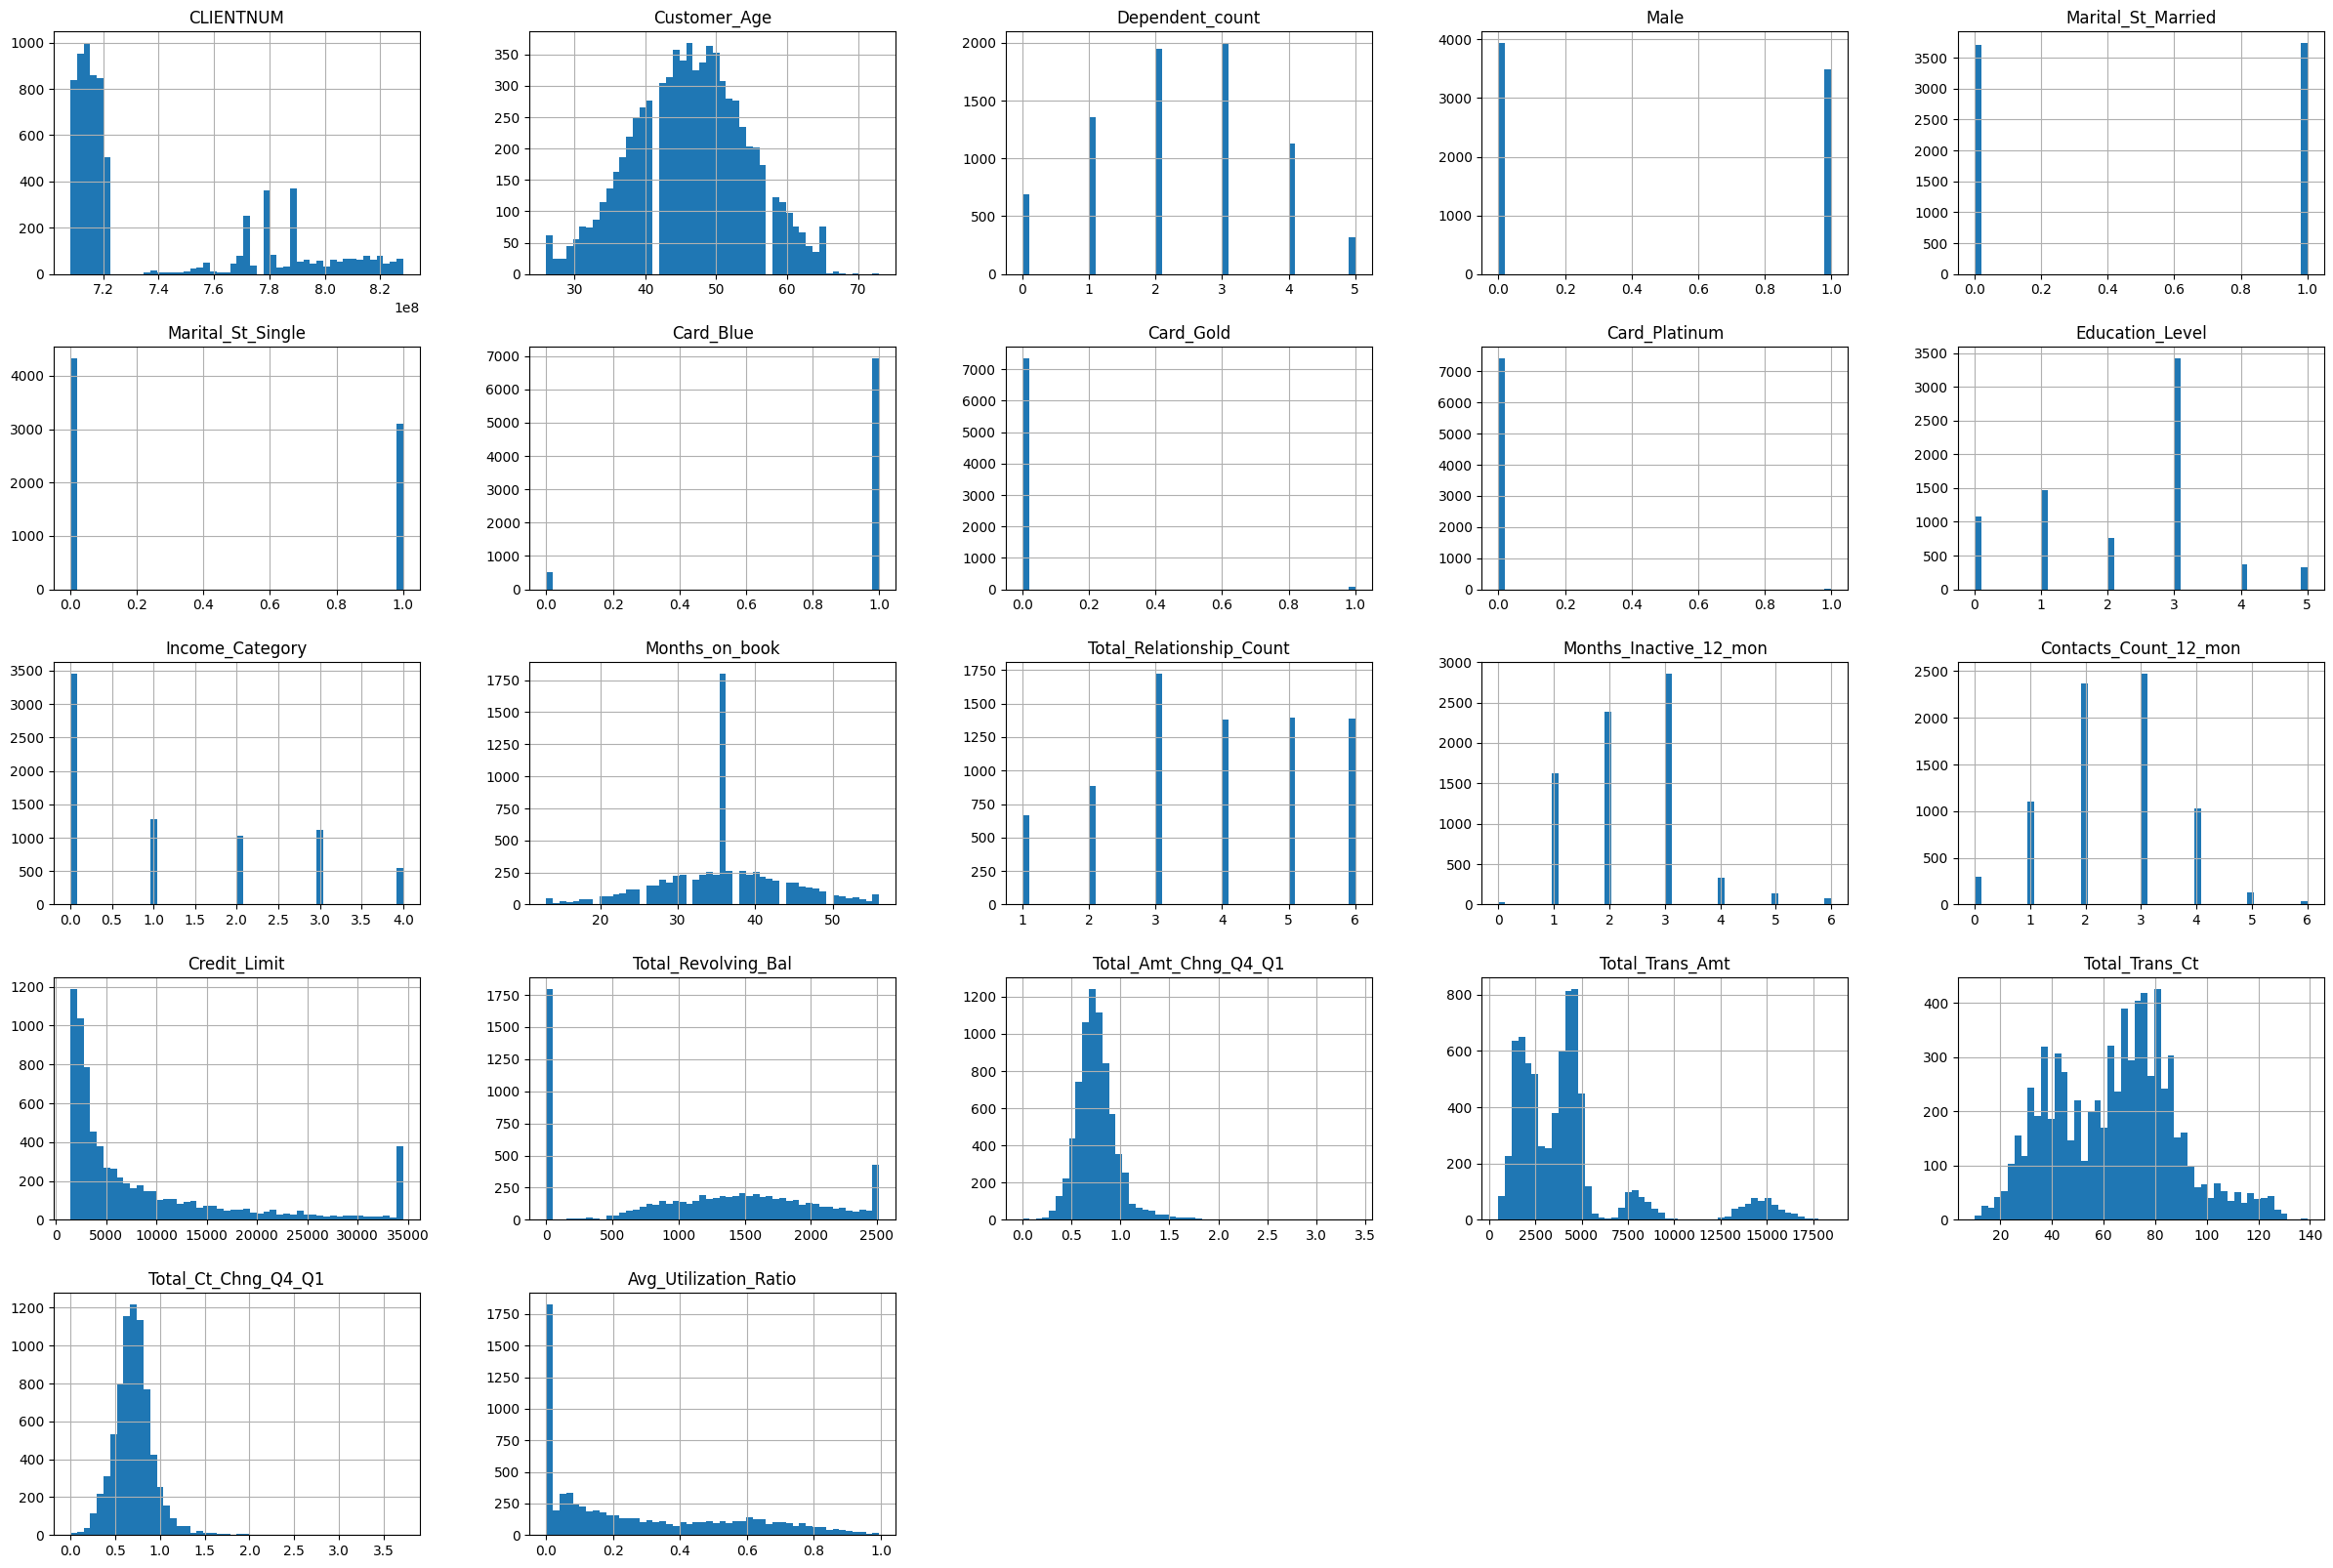

In [26]:
df.hist(bins = 50, figsize=(30,20))

In [27]:
df_cont_Depn_Var = df.drop(['CLIENTNUM','Male', 'Marital_St_Single', 'Marital_St_Married', 'Card_Blue', 'Card_Gold','Card_Platinum', 'Education_Level', 'Income_Category', 'Credit_Limit'], axis = 1)
df_cont_Depn_Var

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45.0,3,39.0,5.0,1,3,777,1.335,1144,42,1.625,0.061
1,49.0,5,44.0,6.0,1,2,864,1.541,1291,33,3.714,0.105
2,51.0,3,36.0,4.0,1,0,0,2.594,1887,20,2.333,0.000
5,44.0,2,36.0,3.0,1,2,1247,1.376,1088,24,0.846,0.311
6,51.0,4,46.0,6.0,1,3,2264,1.975,1330,31,0.722,0.066
...,...,...,...,...,...,...,...,...,...,...,...,...
10139,44.0,1,35.0,6.0,2,2,0,0.736,3770,82,0.864,0.000
10142,41.0,3,30.0,4.0,4,2,2327,0.784,4268,84,1.000,0.709
10144,47.0,5,36.0,3.0,3,1,760,0.407,3756,67,0.558,0.022
10145,46.0,2,27.0,6.0,3,3,1794,0.582,4725,85,0.735,0.182


In [28]:
df_cont_Target_Var = df[['Credit_Limit']]
df_cont_Target_Var

,Credit_Limit
0,12691.0
1,8256.0
2,3418.0
5,4010.0
6,34516.0
...,...
10139,6849.0
10142,3280.0
10144,34516.0
10145,9881.0


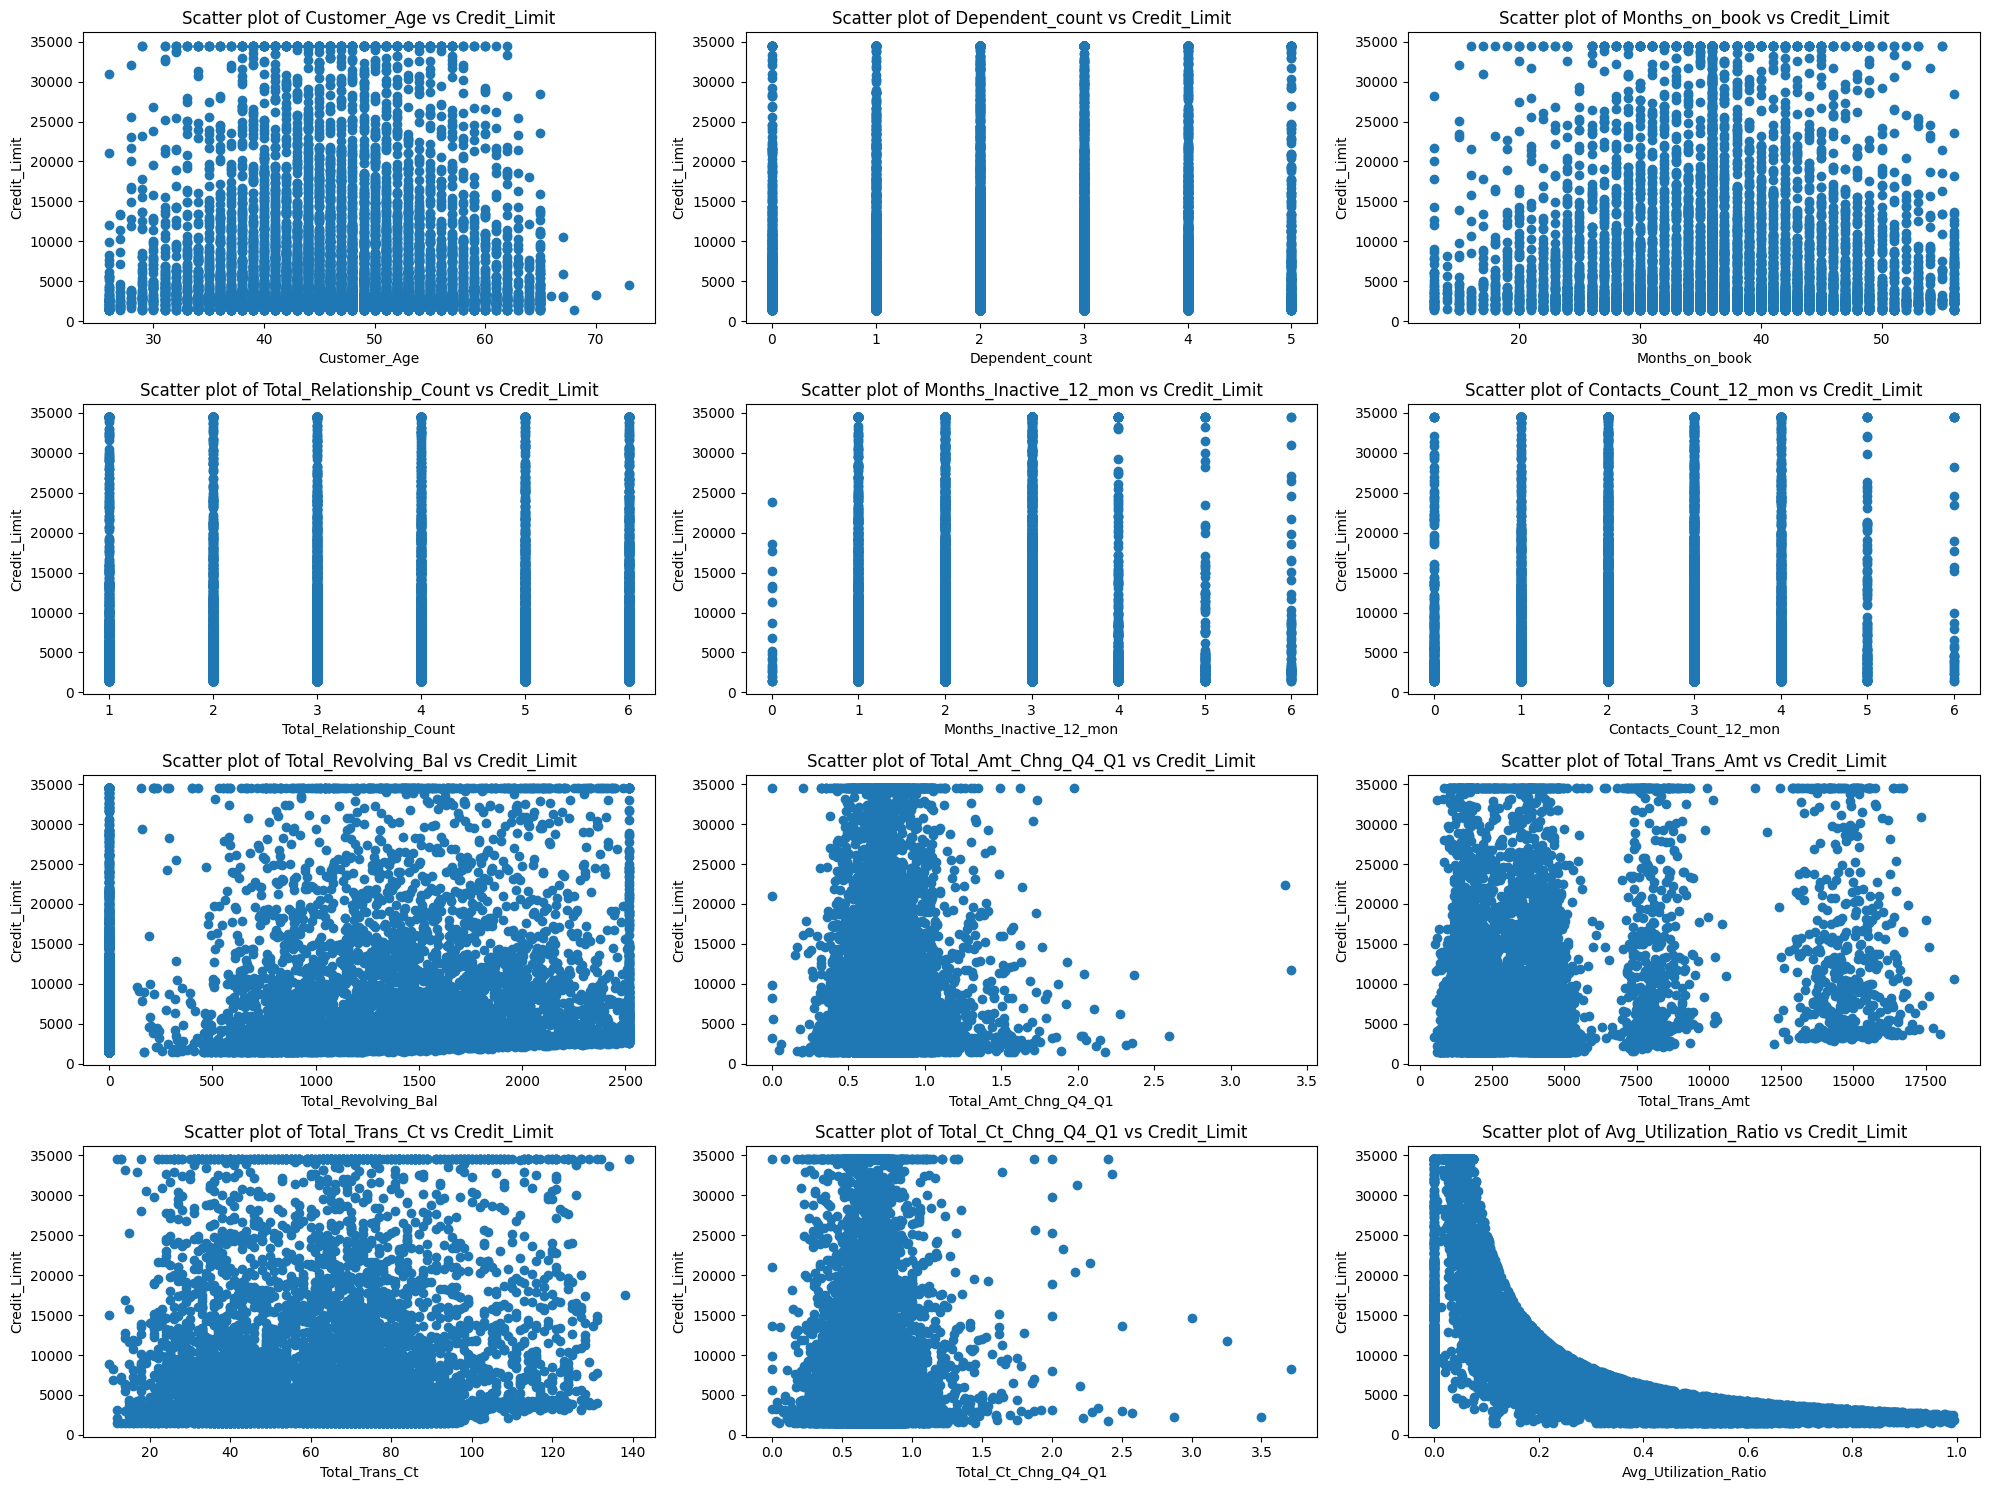

In [29]:
# Plot scatter plots
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_cont_Depn_Var.columns, 1):
    plt.subplot(4, 3, i)
    plt.scatter(df_cont_Depn_Var[column], df_cont_Target_Var)
    plt.title(f'Scatter plot of {column} vs Credit_Limit')
    plt.xlabel(column)
    plt.ylabel('Credit_Limit')

plt.tight_layout()
plt.show()

In [31]:
df = df.drop(['CLIENTNUM'], axis = 1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7435 entries, 0 to 10146
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              7435 non-null   float64
 1   Dependent_count           7435 non-null   int64  
 2   Male                      7435 non-null   int64  
 3   Marital_St_Married        7435 non-null   int64  
 4   Marital_St_Single         7435 non-null   int64  
 5   Card_Blue                 7435 non-null   int64  
 6   Card_Gold                 7435 non-null   int64  
 7   Card_Platinum             7435 non-null   int64  
 8   Education_Level           7435 non-null   int64  
 9   Income_Category           7435 non-null   int64  
 10  Months_on_book            7435 non-null   float64
 11  Total_Relationship_Count  7435 non-null   float64
 12  Months_Inactive_12_mon    7435 non-null   int64  
 13  Contacts_Count_12_mon     7435 non-null   int64  
 14  Credit_Limit

In [32]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Customer_Age', 'Dependent_count', 'Male', 'Marital_St_Married', 'Marital_St_Single', 'Card_Blue',
    'Card_Gold', 'Card_Platinum', 'Education_Level', 'Income_Category', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
    'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']] = scaler.fit_transform(df[['Customer_Age', 'Dependent_count', 'Male',
                                                      'Marital_St_Married', 'Marital_St_Single', 'Card_Blue',
                                                      'Card_Gold', 'Card_Platinum', 'Education_Level', 'Income_Category',
                                                      'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
                                                      'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                                                      'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']])

scaler_credit_Limit = MinMaxScaler()
df[['Credit_Limit']] = scaler_credit_Limit.fit_transform(df[['Credit_Limit']])   #scaled seperately because we want to use this seperate scaler to unscale the label while calculating MSE and MAE for unscaled data to get a better picture of MSE and MAE

df.head()

,Customer_Age,Dependent_count,Male,Marital_St_Married,Marital_St_Single,Card_Blue,Card_Gold,Card_Platinum,Education_Level,Income_Category,...,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.404255,0.6,1.0,1.0,0.0,1.0,0.0,0.0,0.2,0.50,...,0.8,0.166667,0.500000,0.340190,0.308701,0.392994,0.035273,0.248062,0.437534,0.061307
1,0.489362,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.6,0.00,...,1.0,0.166667,0.333333,0.206112,0.343266,0.453636,0.043452,0.178295,1.000000,0.105528
2,0.531915,0.6,1.0,1.0,0.0,1.0,0.0,0.0,0.6,0.75,...,0.6,0.166667,0.000000,0.059850,0.000000,0.763615,0.076611,0.077519,0.628164,0.000000
5,0.382979,0.4,1.0,1.0,0.0,1.0,0.0,0.0,0.6,0.25,...,0.4,0.166667,0.333333,0.077747,0.495431,0.405063,0.032158,0.108527,0.227787,0.312563
6,0.531915,0.8,1.0,1.0,0.0,0.0,1.0,0.0,0.6,1.00,...,1.0,0.166667,0.500000,1.000000,0.899484,0.581395,0.045621,0.162791,0.194400,0.066332


array([[<Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Dependent_count'}>,
        <Axes: title={'center': 'Male'}>,
        <Axes: title={'center': 'Marital_St_Married'}>,
        <Axes: title={'center': 'Marital_St_Single'}>],
       [<Axes: title={'center': 'Card_Blue'}>,
        <Axes: title={'center': 'Card_Gold'}>,
        <Axes: title={'center': 'Card_Platinum'}>,
        <Axes: title={'center': 'Education_Level'}>,
        <Axes: title={'center': 'Income_Category'}>],
       [<Axes: title={'center': 'Months_on_book'}>,
        <Axes: title={'center': 'Total_Relationship_Count'}>,
        <Axes: title={'center': 'Months_Inactive_12_mon'}>,
        <Axes: title={'center': 'Contacts_Count_12_mon'}>,
        <Axes: title={'center': 'Credit_Limit'}>],
       [<Axes: title={'center': 'Total_Revolving_Bal'}>,
        <Axes: title={'center': 'Total_Amt_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Total_Trans_Amt'}>,
        <Axes: title={'center': 'Total_

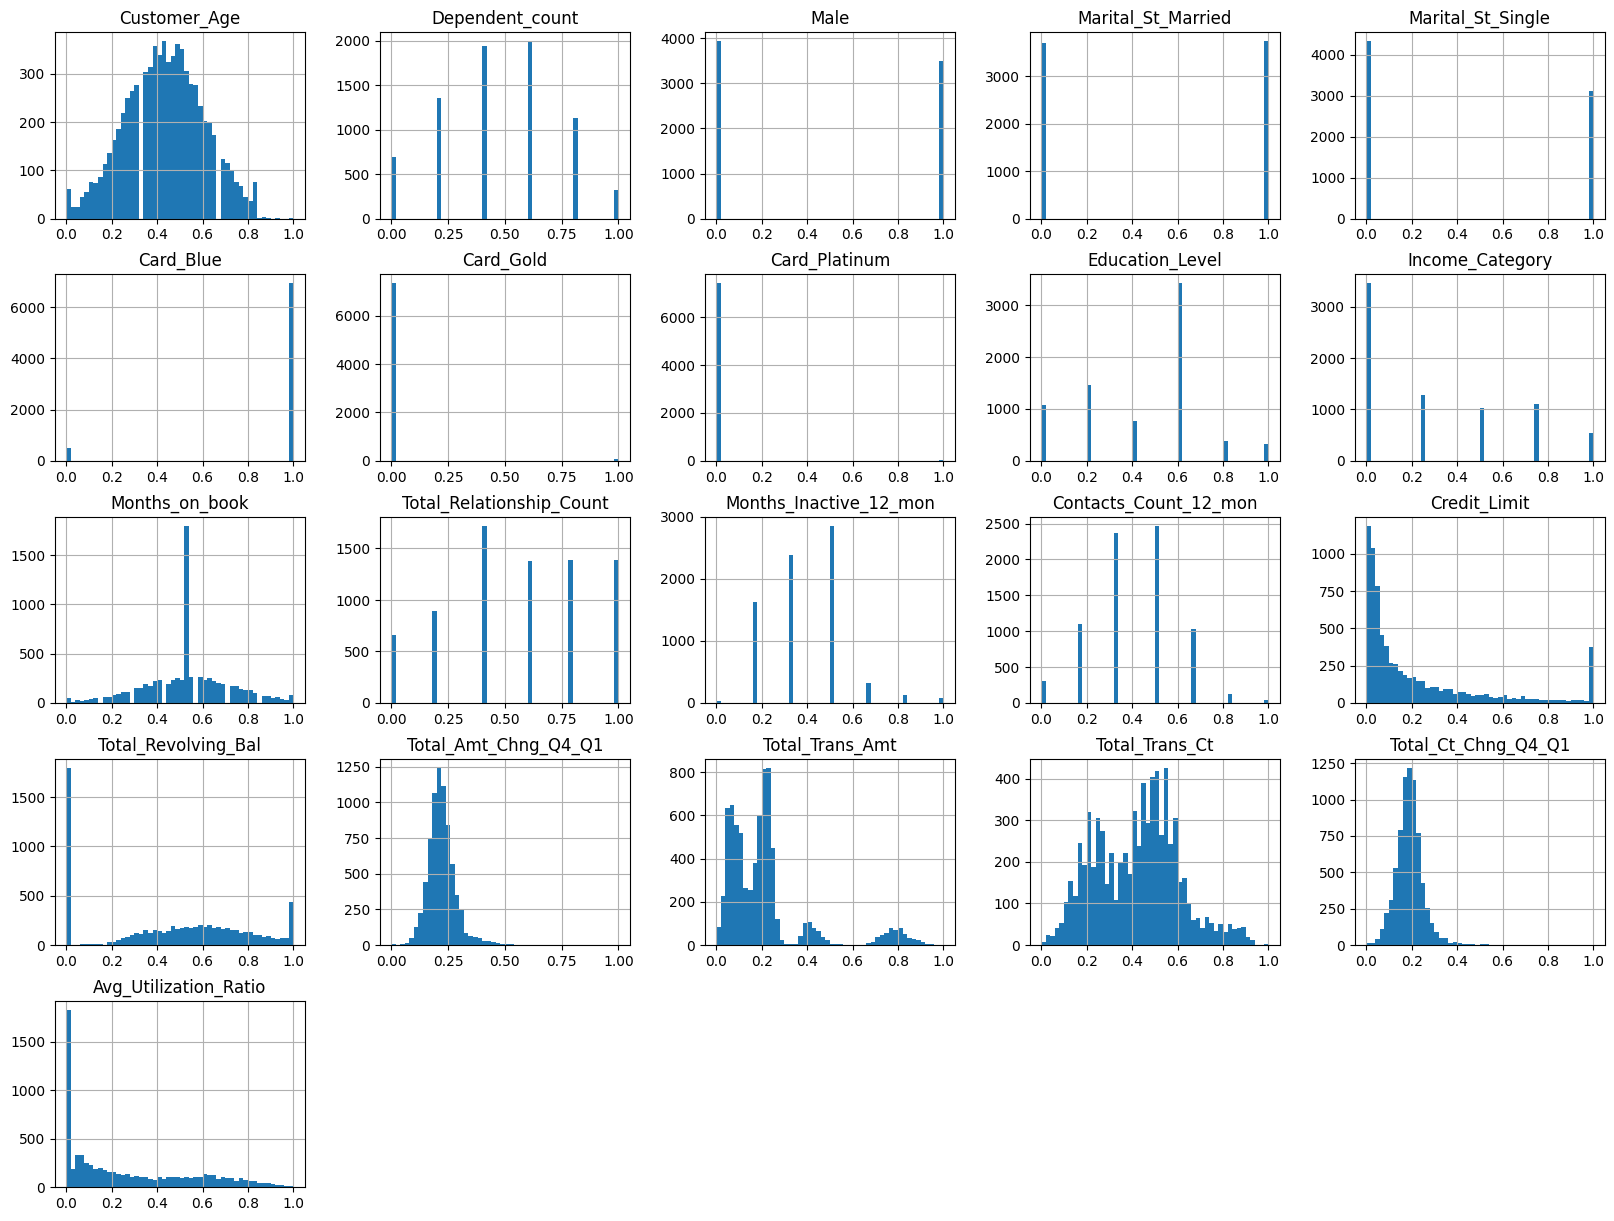

In [33]:
df.hist(bins = 50, figsize=(20,15))

<Axes: >

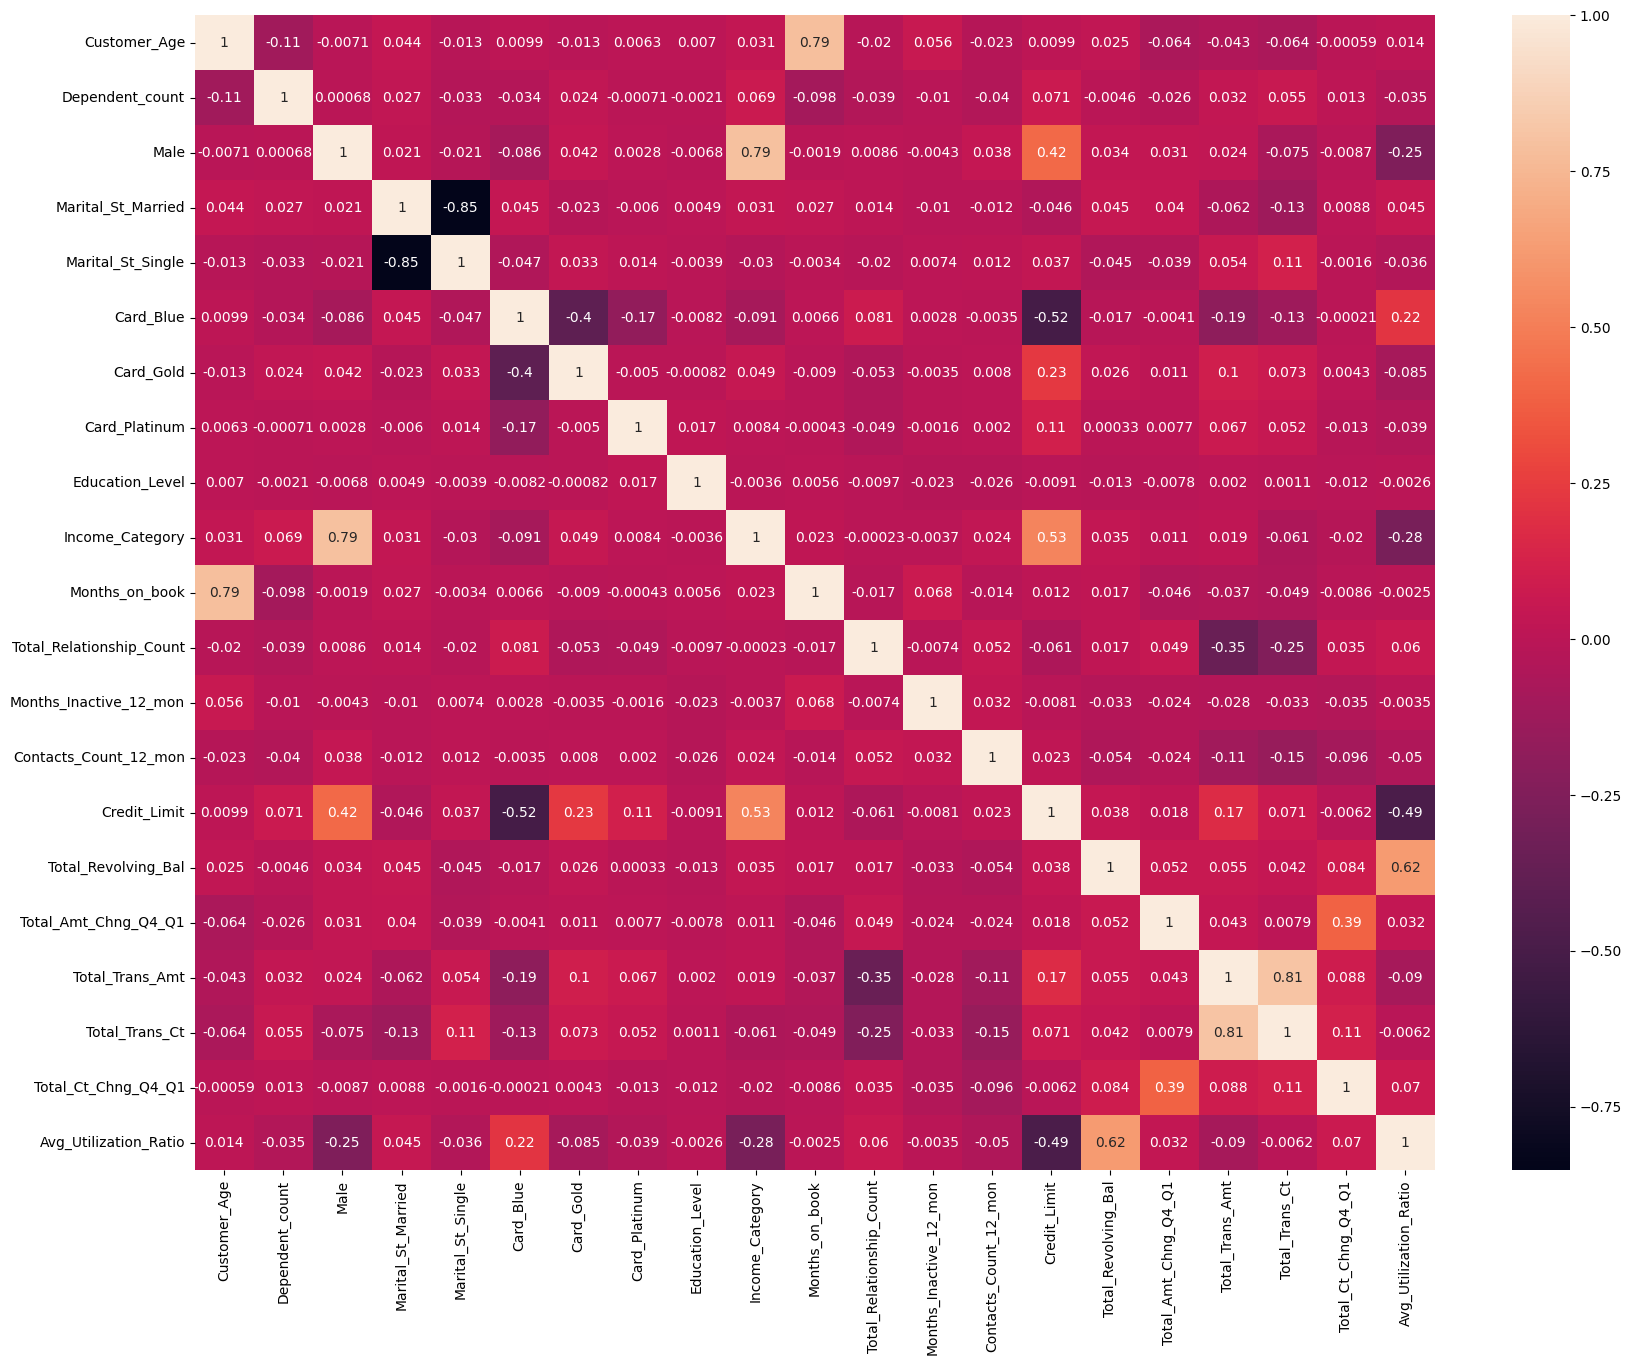

In [68]:
import seaborn as sns

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

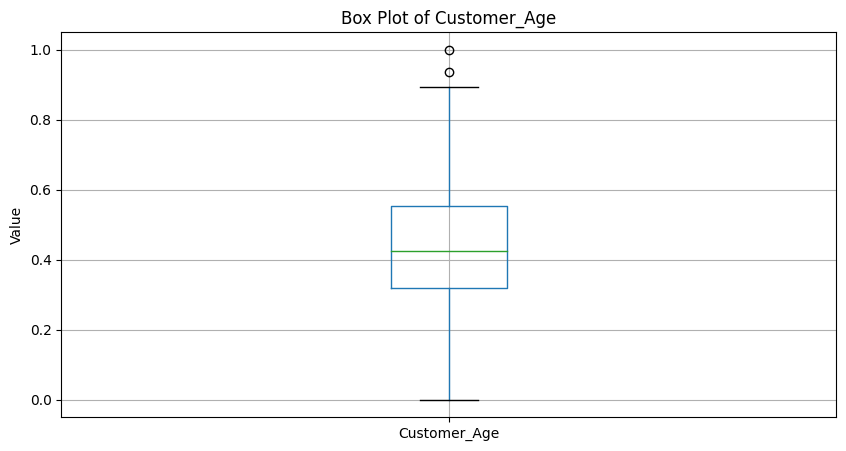

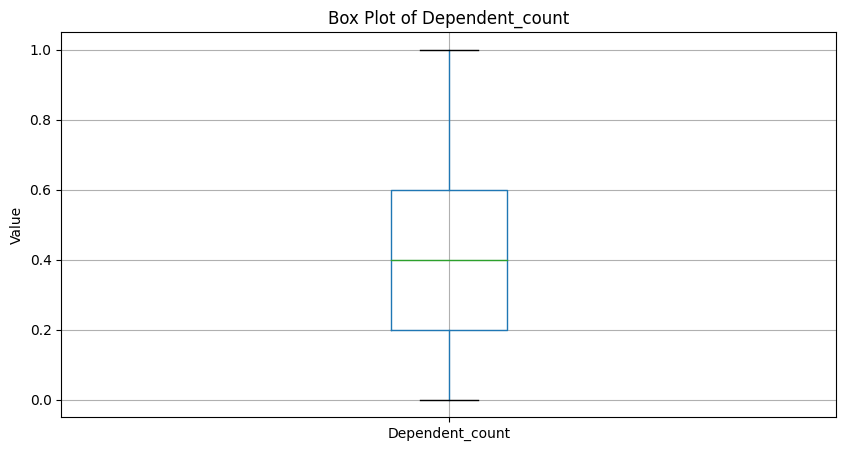

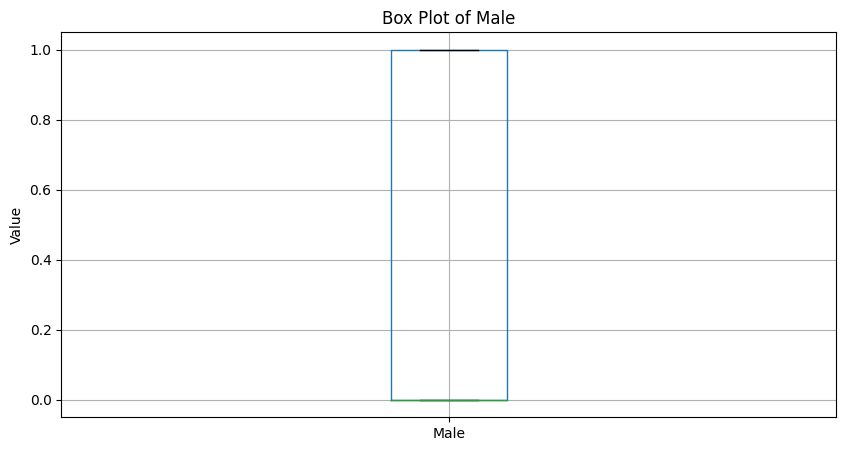

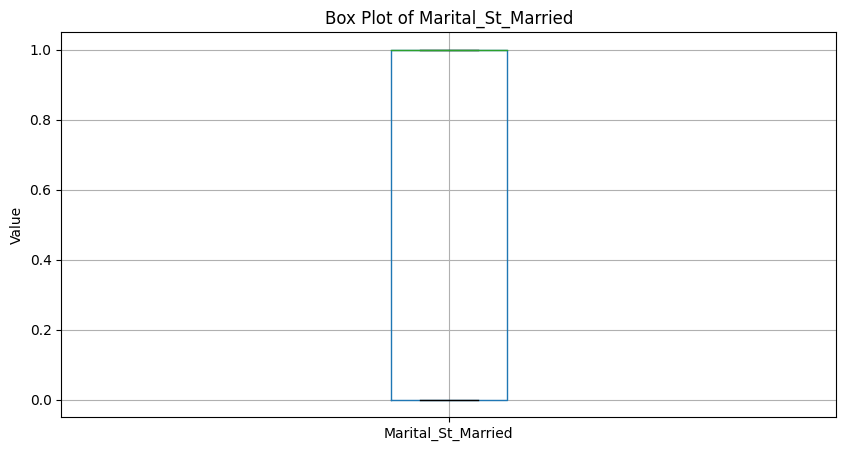

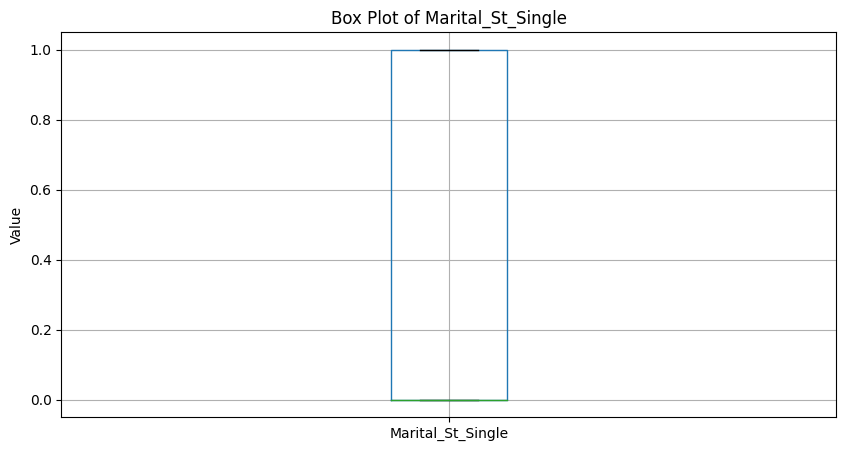

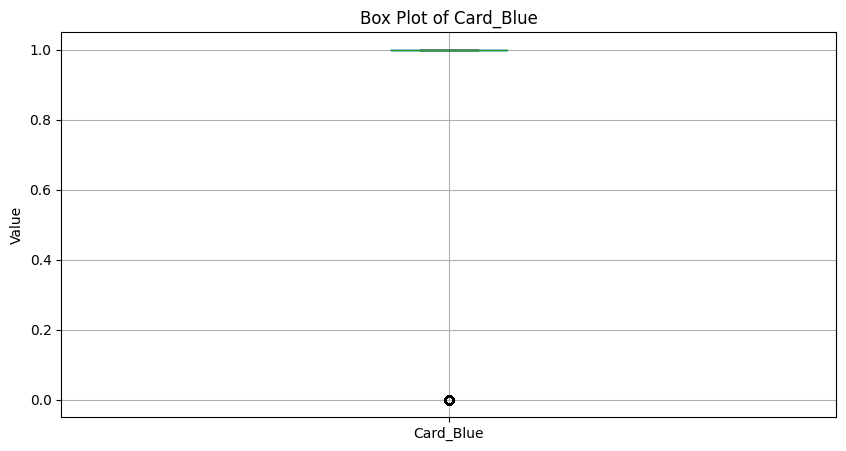

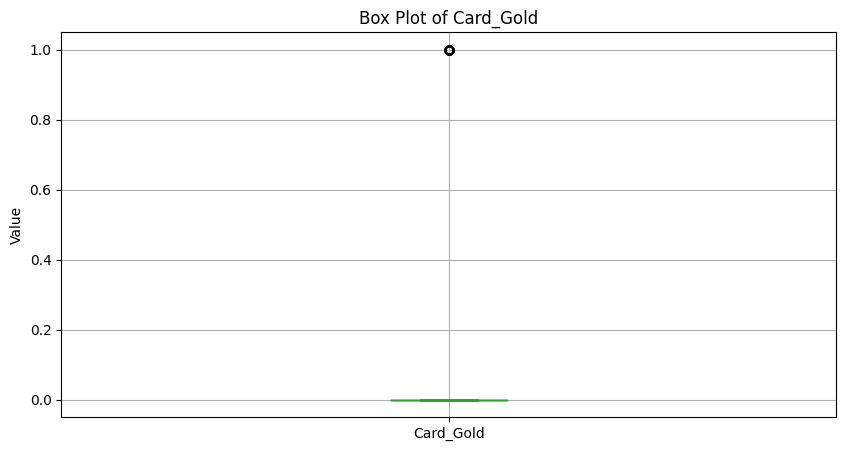

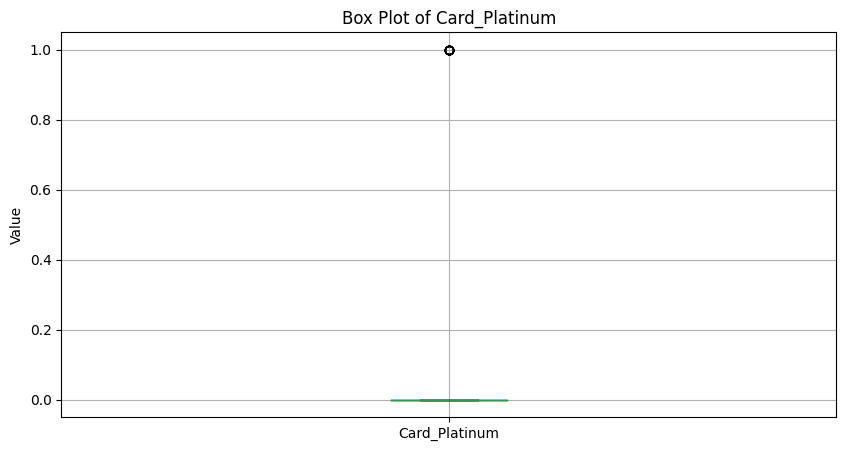

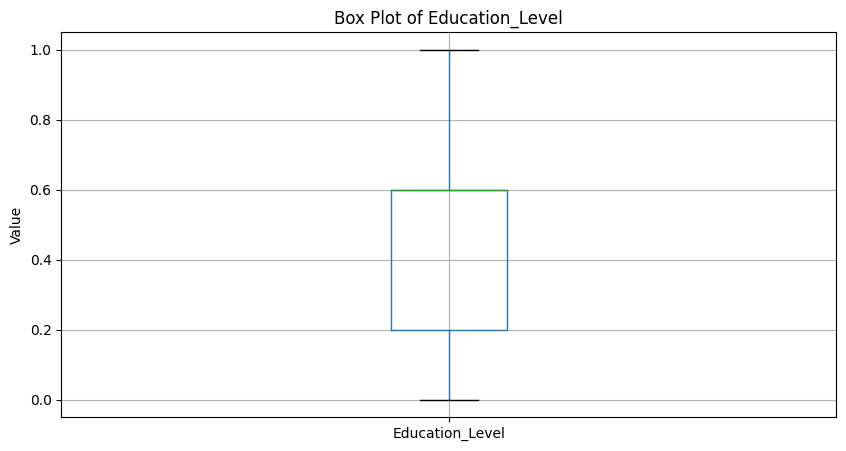

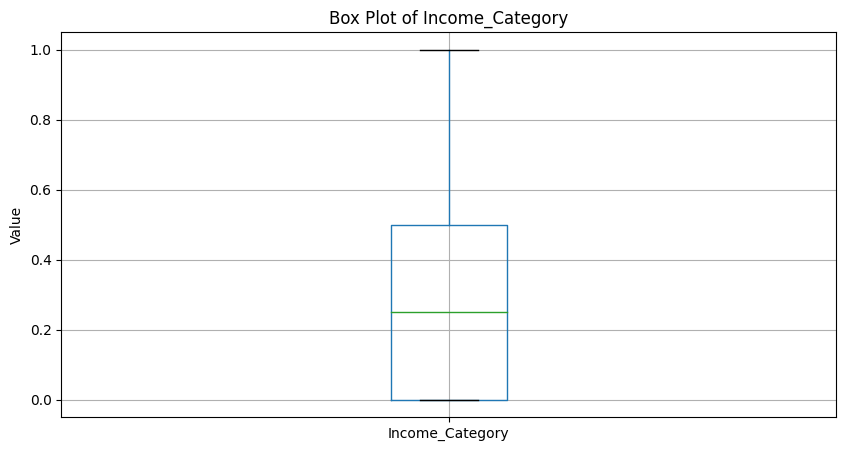

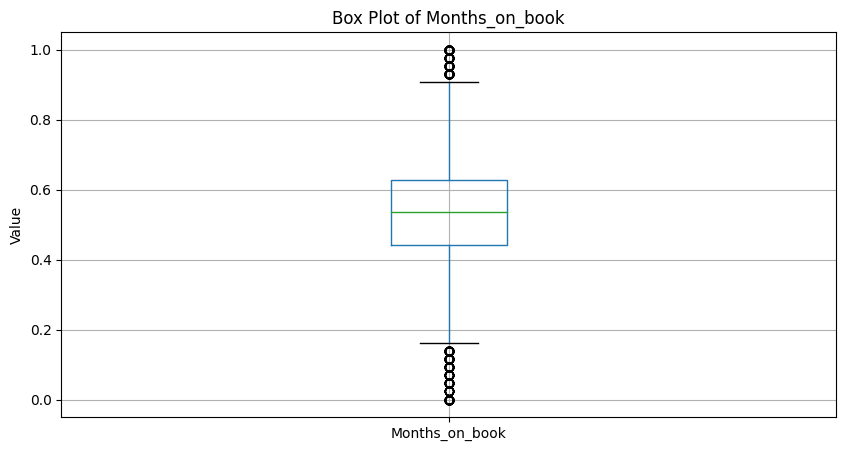

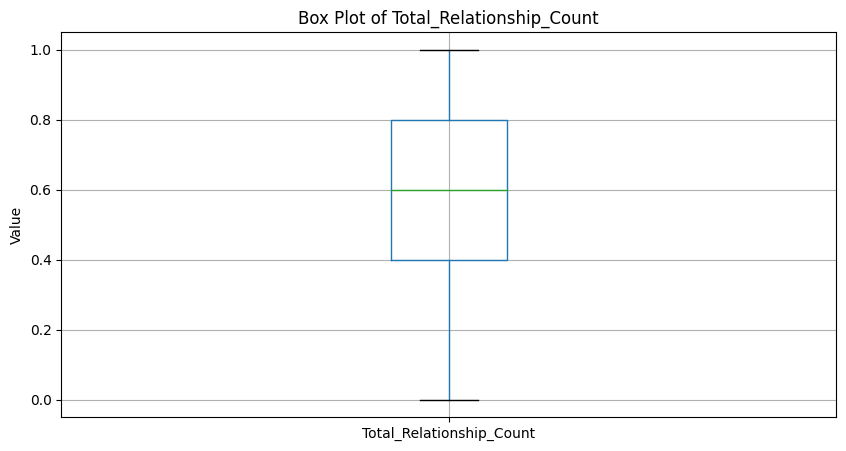

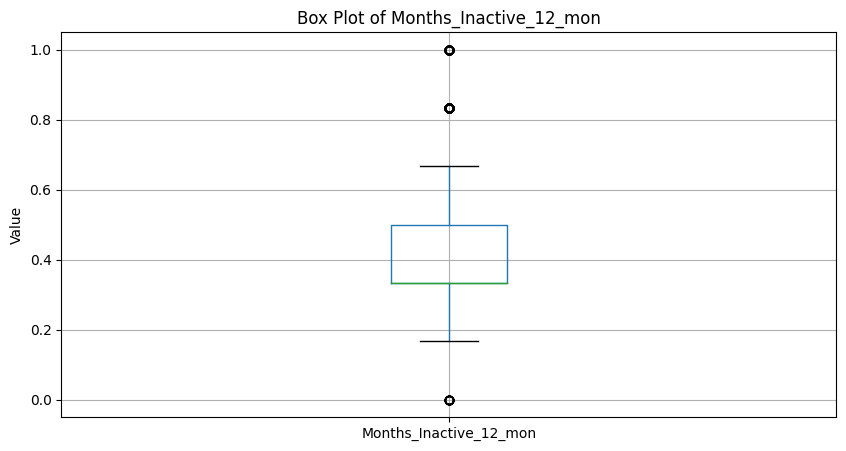

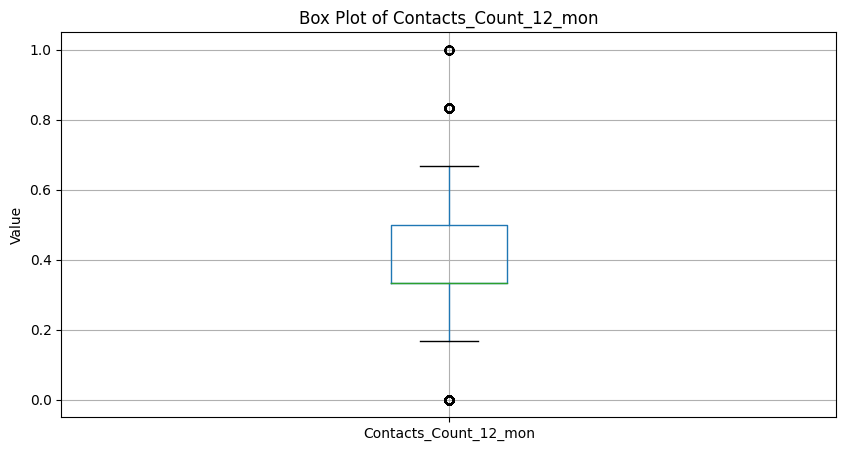

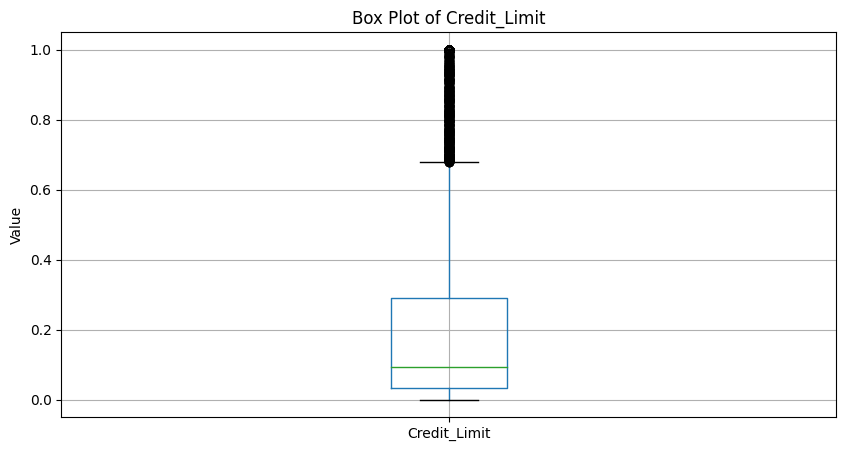

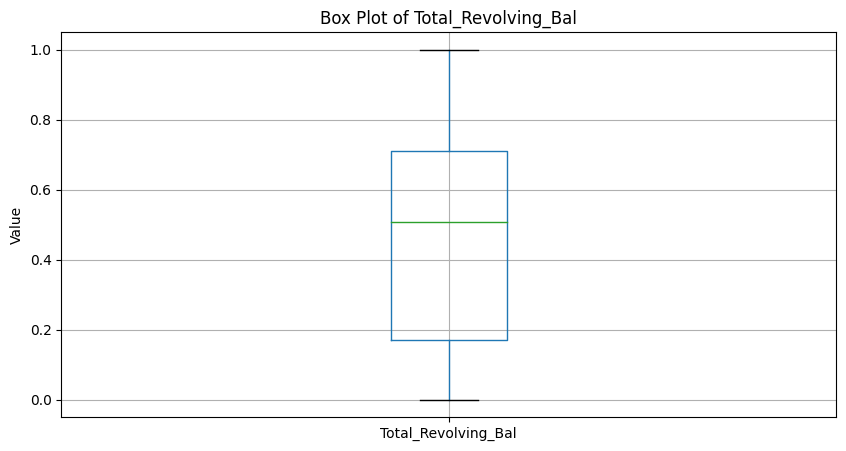

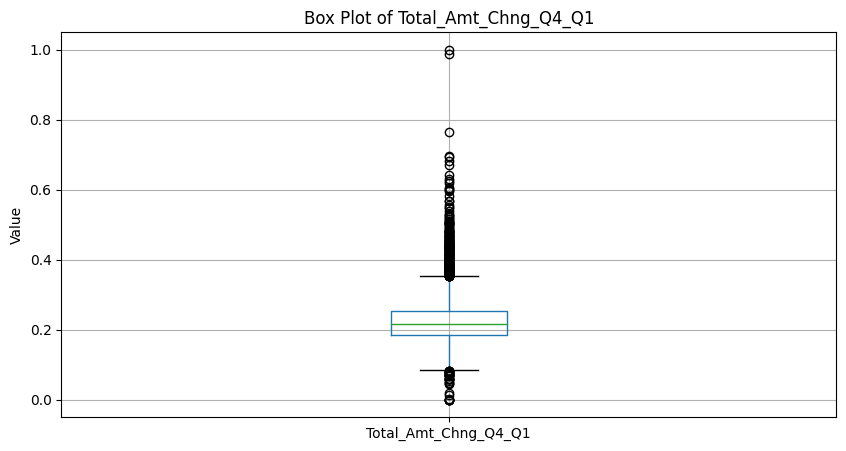

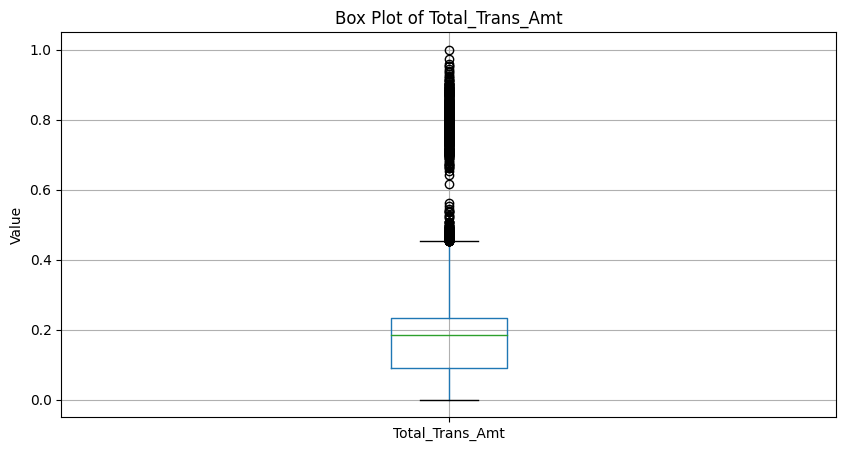

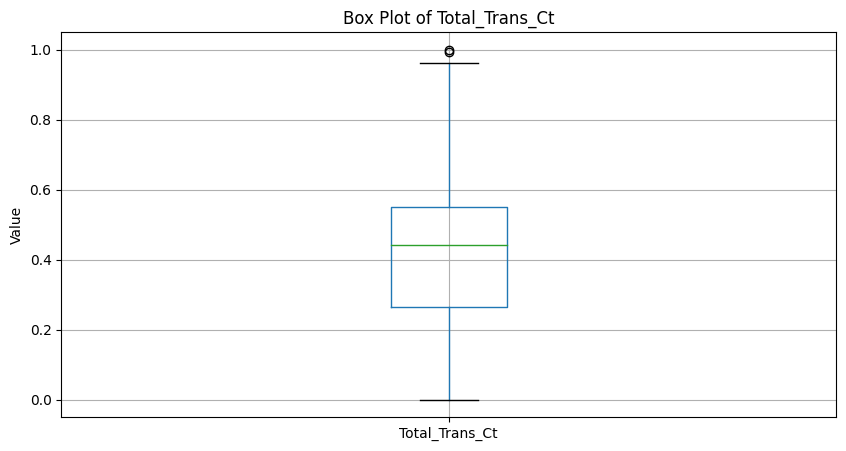

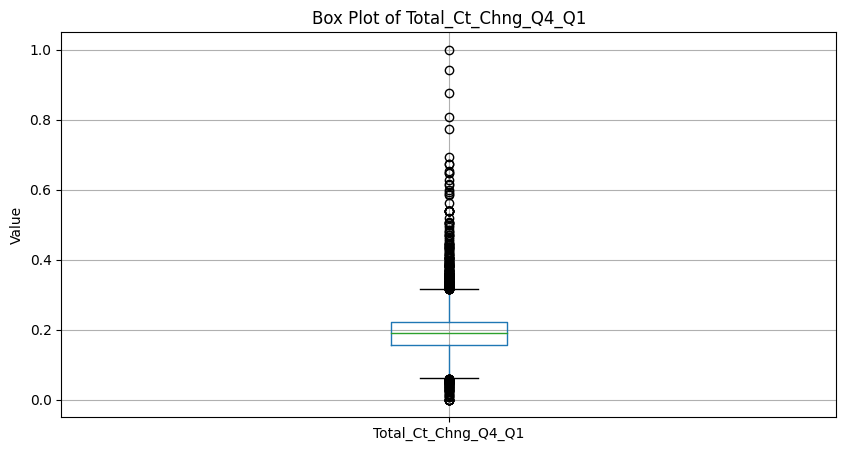

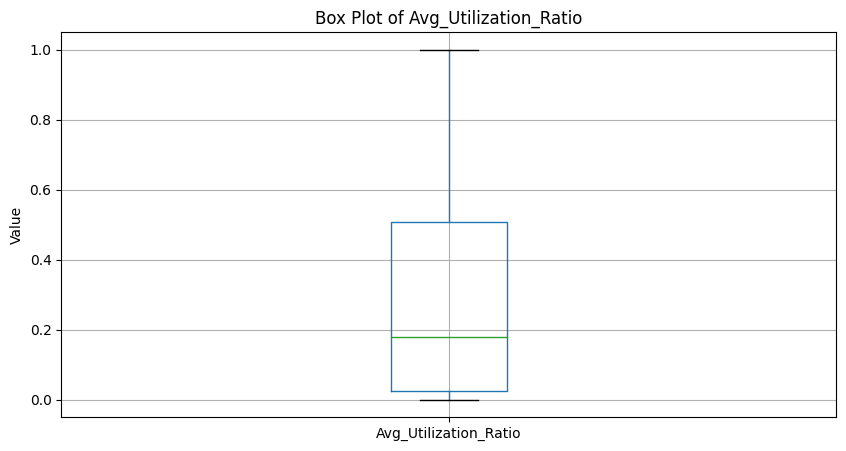

In [69]:
for column in df.columns:
    plt.figure(figsize=(10, 5))
    df.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Value')
    plt.show()

In [ ]:
#creating features

In [34]:
X = df.drop(columns = ["Credit_Limit"])
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7435 entries, 0 to 10146
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              7435 non-null   float64
 1   Dependent_count           7435 non-null   float64
 2   Male                      7435 non-null   float64
 3   Marital_St_Married        7435 non-null   float64
 4   Marital_St_Single         7435 non-null   float64
 5   Card_Blue                 7435 non-null   float64
 6   Card_Gold                 7435 non-null   float64
 7   Card_Platinum             7435 non-null   float64
 8   Education_Level           7435 non-null   float64
 9   Income_Category           7435 non-null   float64
 10  Months_on_book            7435 non-null   float64
 11  Total_Relationship_Count  7435 non-null   float64
 12  Months_Inactive_12_mon    7435 non-null   float64
 13  Contacts_Count_12_mon     7435 non-null   float64
 14  Total_Revolv

In [35]:
#creating label
y = df["Credit_Limit"]
y

0        0.340190
1        0.206112
2        0.059850
5        0.077747
6        1.000000
           ...   
10139    0.163575
10142    0.055678
10144    1.000000
10145    0.255238
10146    0.176364
Name: Credit_Limit, Length: 7435, dtype: float64

In [36]:
#split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

y_train.info()

<class 'pandas.core.series.Series'>
Index: 5948 entries, 4835 to 9924
Series name: Credit_Limit
Non-Null Count  Dtype  
--------------  -----  
5948 non-null   float64
dtypes: float64(1)
memory usage: 92.9 KB


In [37]:
y_train.shape

(5948,)

In [38]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
y_pred = RF_model.predict(X_test)
y_pred

array([0.04893587, 0.02448356, 0.05551202, ..., 0.15471209, 0.03857947,
       0.02549361])

In [42]:
#Model Evaluation

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model when taking all the columns as features

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)

print("R2:", r2)

MSE:  0.01023852266051579
R2: 0.8537245157468079


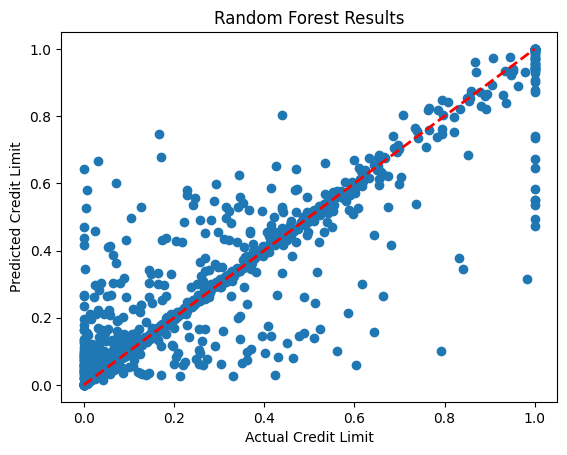

In [41]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Credit Limit')
plt.ylabel('Predicted Credit Limit')
plt.title('Random Forest Results')
plt.show()

In [42]:
# Extract feature importances
importances = RF_model.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(importance_df)

                     Feature  Importance
19     Avg_Utilization_Ratio    0.321174
9            Income_Category    0.227188
5                  Card_Blue    0.208720
14       Total_Revolving_Bal    0.116323
15      Total_Amt_Chng_Q4_Q1    0.019438
16           Total_Trans_Amt    0.018295
18       Total_Ct_Chng_Q4_Q1    0.017135
17            Total_Trans_Ct    0.013280
10            Months_on_book    0.011351
0               Customer_Age    0.010485
11  Total_Relationship_Count    0.007750
13     Contacts_Count_12_mon    0.006576
1            Dependent_count    0.006194
8            Education_Level    0.004741
12    Months_Inactive_12_mon    0.004568
4          Marital_St_Single    0.002371
3         Marital_St_Married    0.001913
7              Card_Platinum    0.001210
6                  Card_Gold    0.000755
2                       Male    0.000532


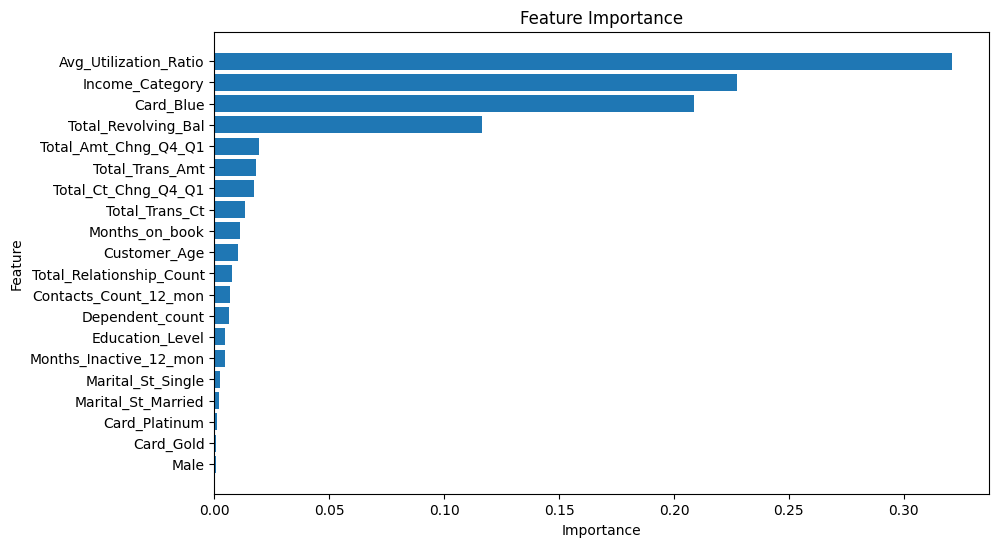

In [43]:
#Visualize features importance

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#Looking back to feature selection
# From the heat map above it can be observed that the "Total_Trans_Amt" and "Total_Trans_Ct" are highy correlated and the feature importance score from the random forest i.e "Total_Trans_Amt" (0.018295) slighly higher than that of "Total_Trans_Ct" (0.013280)
# Therefore, eliminating "Total_Trans_Ct" from features

#Additionally, from the above bar graph and feature importance score, we can see till customer age the score is > 0.01 (we are setting this score as a threshold).
#Therefore, selecting only from Avy_Utilization_ratio till Customer_Age from above graph


In [44]:
X = df[["Avg_Utilization_Ratio", "Income_Category", "Card_Blue", "Total_Revolving_Bal",
        "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt",
        "Total_Ct_Chng_Q4_Q1", "Months_on_book", "Customer_Age"]]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7435 entries, 0 to 10146
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Avg_Utilization_Ratio  7435 non-null   float64
 1   Income_Category        7435 non-null   float64
 2   Card_Blue              7435 non-null   float64
 3   Total_Revolving_Bal    7435 non-null   float64
 4   Total_Amt_Chng_Q4_Q1   7435 non-null   float64
 5   Total_Trans_Amt        7435 non-null   float64
 6   Total_Ct_Chng_Q4_Q1    7435 non-null   float64
 7   Months_on_book         7435 non-null   float64
 8   Customer_Age           7435 non-null   float64
dtypes: float64(9)
memory usage: 580.9 KB


In [45]:
#creating label
y = df["Credit_Limit"]
y

0        0.340190
1        0.206112
2        0.059850
5        0.077747
6        1.000000
           ...   
10139    0.163575
10142    0.055678
10144    1.000000
10145    0.255238
10146    0.176364
Name: Credit_Limit, Length: 7435, dtype: float64

In [46]:
#split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

y_train.info()

<class 'pandas.core.series.Series'>
Index: 5948 entries, 4835 to 9924
Series name: Credit_Limit
Non-Null Count  Dtype  
--------------  -----  
5948 non-null   float64
dtypes: float64(1)
memory usage: 92.9 KB


In [47]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
y_pred = RF_model.predict(X_test)
y_pred

array([0.07655242, 0.0245147 , 0.05553318, ..., 0.15634249, 0.0385314 ,
       0.02543647])

In [49]:
y_test = y_test.values   #converting to array so that y_pred and y_test have the same data type
y_test

array([0.07974255, 0.02317876, 0.05431756, ..., 0.15190597, 0.03847607,
       0.02517406])

In [50]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the model after removing features having importance score < 0.01

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)

print("MAE: ", mae)

print("RMSE: ", rmse)

print("R2:", r2)

MSE:  0.010228658932868817
MAE:  0.04145424226110283
RMSE:  0.10113683272116453
R2: 0.8538654366184943


In [51]:
#Since, MSE and MAE are calculated using scaled data, unscaling the lables to get a picture of MSE and MAE.

y_test_unscaled = scaler_credit_Limit.inverse_transform(y_test.reshape(-1,1))
y_pred_unscaled = scaler_credit_Limit.inverse_transform(y_pred.reshape(-1,1))

mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
rmse = np.sqrt(mse)


print("MSE: ", mse)

print("MAE: ", mae)

print("RMSE: ", rmse)





MSE:  11191525.940013966
MAE:  1371.2109892400806
RMSE:  3345.373811700864


In [52]:
# Calculate NRMSE with range
range_y = np.max(y_test_unscaled) - np.min(y_test_unscaled)
nrmse_range = rmse / range_y

nrmse_range

0.10113683272116454

In [54]:
# Calculate the variance of the original target variable (before scaling)
original_y_variance = np.var(y_test_unscaled )  # y_test_original is the original (unscaled) target variable

# Calculate the MSE on the scaled data
mse_scaled = mean_squared_error(y_test, y_pred)  # y_test_scaled and y_pred_scaled are scaled values

# Calculate normalized MSE
normalized_mse = mse_scaled / original_y_variance

print(f"Normalized MSE: {normalized_mse}")

Normalized MSE: 1.3356182303869603e-10


In [55]:
y_test_unscaled = y_test_unscaled.ravel()
print(y_test_unscaled)

y_pred_unscaled = y_pred_unscaled.ravel()
print(y_pred_unscaled)

[4076. 2205. 3235. ... 6463. 2711. 2271.]
[3970.478 2249.19  3275.21  ... 6609.75  2712.83  2279.68 ]


In [56]:
performance = pd.DataFrame({'Predictions':y_pred_unscaled,'Actual Values':y_test_unscaled})
performance['Error'] = performance['Actual Values'] - performance['Predictions']
performance

,Predictions,Actual Values,Error
0,3970.478,4076.0,105.522
1,2249.190,2205.0,-44.190
2,3275.210,3235.0,-40.210
3,19093.700,12856.0,-6237.700
4,3153.690,3176.0,22.310
...,...,...,...
1482,26619.413,34516.0,7896.587
1483,3532.064,13019.0,9486.936
1484,6609.750,6463.0,-146.750
1485,2712.830,2711.0,-1.830


In [57]:
mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
r2 = r2_score(y_test_unscaled, y_pred_unscaled)

print("MSE: ", mse)

print("MAE: ", mae)

print("R2:", r2)    #https://www.fool.com/the-ascent/credit-cards/good-credit-limit/

MSE:  11191525.940013966
MAE:  1371.2109892400806
R2: 0.8538654366184943


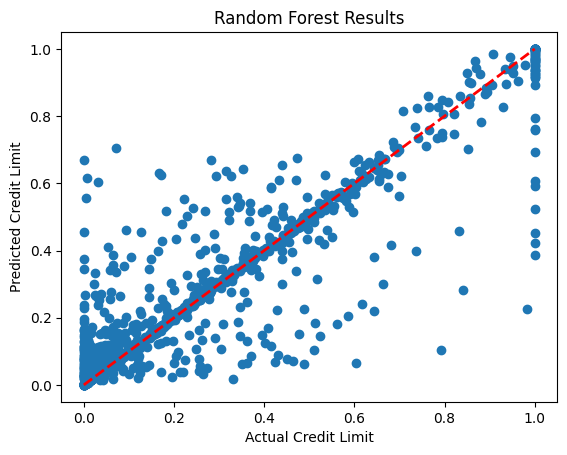

In [58]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Credit Limit')
plt.ylabel('Predicted Credit Limit')
plt.title('Random Forest Results')
plt.show()

In [59]:
# Extract feature importances
importances = RF_model.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(importance_df)

                 Feature  Importance
0  Avg_Utilization_Ratio    0.323198
1        Income_Category    0.227752
2              Card_Blue    0.208727
3    Total_Revolving_Bal    0.117534
5        Total_Trans_Amt    0.031098
6    Total_Ct_Chng_Q4_Q1    0.028171
4   Total_Amt_Chng_Q4_Q1    0.027881
7         Months_on_book    0.018270
8           Customer_Age    0.017370


In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF_model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {scores}")
print(f"Mean R² score: {scores.mean()}")


Cross-validated R² scores: [0.85227498 0.83127325 0.80750849 0.78989365 0.85927625]
Mean R² score: 0.8280453237005518


In [61]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# parameter grid with distributions
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=50,  # Number of parameter settings sampled
                                   cv=3,  # 3-fold cross-validation
                                   n_jobs=-1,  # Use all available CPU cores
                                   verbose=2,
                                   scoring='neg_mean_squared_error')

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and train the model
best_params = random_search.best_params_
print("Best Parameters: ", best_params)

best_rf_model = random_search.best_estimator_

# Evaluate the tuned model
y_pred_best = best_rf_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'MSE: {mse_best}')
print(f'MAE: {mae_best}')
print(f'R2: {r2_best}')


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 193}
MSE: 0.009312620077778931
MAE: 0.040863360724531124
R2: 0.8669526789449438


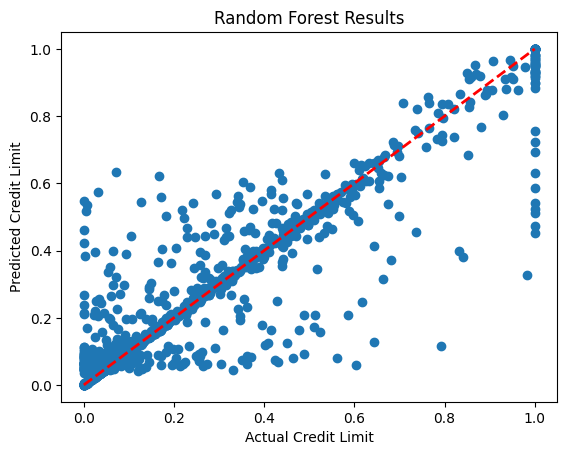

In [62]:
plt.scatter(y_test, y_pred_best)
plt.plot([min(y_test), max(y_test)], [min(y_pred_best), max(y_pred_best)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Credit Limit')
plt.ylabel('Predicted Credit Limit')
plt.title('Random Forest Results')
plt.show()

In [63]:
y_pred_best

array([0.08039818, 0.02564389, 0.05567609, ..., 0.153562  , 0.0386953 ,
       0.02490054])

In [64]:
y_pred_best_unscaled = scaler_credit_Limit.inverse_transform(y_pred_best.reshape(-1,1))
y_pred_best_unscaled

array([[4097.68697899],
       [2286.54105548],
       [3279.93706011],
       ...,
       [6517.7778373 ],
       [2718.25147794],
       [2261.95265489]])

In [65]:
y_test_unscaled = scaler_credit_Limit.inverse_transform(y_test.reshape(-1,1))
y_test_unscaled

array([[4076.],
       [2205.],
       [3235.],
       ...,
       [6463.],
       [2711.],
       [2271.]])

In [71]:
# Evaluate the tuned model in unscaled data

mse_best = mean_squared_error(y_test_unscaled, y_pred_best_unscaled)
mae_best = mean_absolute_error(y_test_unscaled, y_pred_best_unscaled)
r2_best = r2_score(y_test_unscaled, y_pred_best_unscaled)

rmse_best = np.sqrt(mse_best)

print(f'MSE: {mse_best}')
print(f'MAE: {mae_best}')
print(f'R2: {r2_best}')
print(f'RMSE: {rmse_best}')

MSE: 10189256.465972189
MAE: 1351.665987037823
R2: 0.8669526789449437
RMSE: 3192.061475907409


In [72]:
# Calculate NRMSE with range
range_y = np.max(y_test_unscaled) - np.min(y_test_unscaled)
nrmse_range_best = rmse_best / range_y

nrmse_range_best

0.09650191748239477